In [1]:
# 사이트에 자료 요청
import urllib.request
# json 데이터 핸들링
import json
# DataFrame 자료형 활용
import pandas as pd
# json 데이터를 pandasDataFrame 변환
from pandas.io.json import json_normalize
import numpy as np

In [8]:
api_key = "697a686c426c6368353144556c6e4e"
url = "http://openAPI.seoul.go.kr:8088/%s/json/ServiceInternetShopInfo/1/1000" % (api_key)
print(url)

http://openAPI.seoul.go.kr:8088/697a686c426c6368353144556c6e4e/json/ServiceInternetShopInfo/1/1000


In [9]:
# 데이터 요청
r = urllib.request.urlopen(url)

# 파이썬 내부 데이터로 변경
json_raw = r.read()

In [10]:
# 바이트 자료형 확인, 한글로 변경
json_utf8 = json_raw.decode("utf-8")
json_utf8

'{"ServiceInternetShopInfo":{"list_total_count":135379,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"COMPANY":"주식회사 클린씨","SHOP_NAME":"cleanc/클린씨","DOMAIN_NAME":"www.cleanc.kr","TEL":"02-529-1845","EMAIL":"info@cleanc.kr","UPJONG_NBR":"","YPFORM":"","FIRST_HEO_DATE":"2018-11-02","COM_ADDR":"서울특별시 송파구 충민로66 가든파이브라이프 테크노관 제9층 9089,9096호","STAT_NM":"광고용(홍보용)","TOT_RATINGPOINT":"0","CHOGI_RATINGPOINT":"0","CHUNG_RATINGPOINT":"0","DEAL_RATINGPOINT":"0","PYOJUN_RATINGPOINT":"0","SECURITY_RATINGPOINT":"0","SERVICE":"","CHUNG":"","CHOGI":"","GYULJE":"","PYOJUN":"","P_INFO_CARE":"","PER_INFO":"","DEAL_CARE":"","SSL_YN":"","INJEUNG":"","BAESONG_YEJEONG":"","BAESONG":"","CLIENT_BBS":"","LEAVE":"","KAESOL_YEAR":"","REG_DATE":"2022-07-26"},{"COMPANY":"(주)아이우디","SHOP_NAME":"아이우디/iwoodiy","DOMAIN_NAME":"iwoodiy.com","TEL":"02-929-2144/","EMAIL":"iwoodiy1@naver.com","UPJONG_NBR":"","YPFORM":" 일반쇼핑몰","FIRST_HEO_DATE":"2020-04-03","COM_ADDR":"서울특별시 성북구 보문로 42","STAT_NM":"영업중","TOT_RATINGPO

In [11]:
# 데이터프레임으로 바꾸기 위해 딕셔너리 형태로 먼저 변경
json_complete = json.loads(json_utf8)

In [12]:
# 데이터프레임으로 변경
pd.json_normalize(json_complete)

,ServiceInternetShopInfo.list_total_count,ServiceInternetShopInfo.RESULT.CODE,ServiceInternetShopInfo.RESULT.MESSAGE,ServiceInternetShopInfo.row
0,135379,INFO-000,정상 처리되었습니다,"[{'COMPANY': '주식회사 클린씨', 'SHOP_NAME': 'cleanc/..."


In [13]:
box_result = pd.json_normalize(json_complete['ServiceInternetShopInfo']['row'])

In [14]:
box_result

,COMPANY,SHOP_NAME,DOMAIN_NAME,TEL,EMAIL,UPJONG_NBR,YPFORM,FIRST_HEO_DATE,COM_ADDR,STAT_NM,...,PER_INFO,DEAL_CARE,SSL_YN,INJEUNG,BAESONG_YEJEONG,BAESONG,CLIENT_BBS,LEAVE,KAESOL_YEAR,REG_DATE
0,주식회사 클린씨,cleanc/클린씨,www.cleanc.kr,02-529-1845,info@cleanc.kr,,,2018-11-02,"서울특별시 송파구 충민로66 가든파이브라이프 테크노관 제9층 9089,9096호",광고용(홍보용),...,,,,,,,,,,2022-07-26
1,(주)아이우디,아이우디/iwoodiy,iwoodiy.com,02-929-2144/,iwoodiy1@naver.com,,일반쇼핑몰,2020-04-03,서울특별시 성북구 보문로 42,영업중,...,,에스크로제도,,,있다,철회 안 됨,있다(비공개),회원탈퇴 가능,2021,2022-07-26
2,주식회사 에이드런,adren/에이드런,withadren.com,확인안됨,adren@withadren.com,,일반쇼핑몰,2021-10-21,"서울특별시 마포구 성미산로15길 97, 2층",등록정보불일치,...,,에스크로제도,,,있다,소비자(반품택배비만 부담),있다(공개),회원탈퇴 가능,알수없음,2022-07-26
3,주식회사 엘에이알,LAR / 엘에이알,larshoes.com,02-499-1110,info@larshoes.com,,일반쇼핑몰,2020-05-25,서울특별시 성동구 서울숲길 54 (성수동1가),등록정보불일치,...,,에스크로제도,,,있다,소비자(왕복택배비 부담),있다(공개),회원탈퇴 가능,2020,2022-07-25
4,(주)우드락공작소,우드락공작소/woodrock,https://woodrock.kr/,02-2663-7020,anidream76@naver.com,,일반쇼핑몰,2019-03-05,서울특별시 강서구 금낭화로 95(방화동) 지하1층,영업중,...,,구매안전서비스없음,,,있다,소비자(반품택배비만 부담),있다(공개),회원탈퇴 가능,2016,2022-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,태연하다,확인안됨,www.instagram.com/__t.a.e.t.a.e,확인안됨,semifinger@naver.com,,오픈마켓,2019-02-28,확인안됨,사이트운영중단,...,,에스크로제도,,,있다,소비자(왕복택배비 부담),있다(공개),회원탈퇴 가능,알수없음,2022-06-30
996,주식회사 휴롬엘에스,휴롬공식몰/hurom,www.hurom.co.kr,1544-7011,huromcs@hurom.com,,일반쇼핑몰,2019-12-31,서울시 강남구 학동로 288,등록정보불일치,...,,에스크로제도,,,있다,소비자(반품택배비만 부담),있다(공개),회원탈퇴 가능,2013,2022-06-30
997,(주)티에프인터네셔널(TFP International),확인안됨,www.dexxter.co.kr,02-542-6435,tfp-international@naver.com,,일반쇼핑몰,2018-01-31,확인안됨,사이트운영중단,...,,에스크로제도,,,있다,소비자(반품택배비만 부담),있다(공개),회원탈퇴 가능,알수없음,2022-06-30
998,스터드풀/STUDPOOL,스터드풀/STUDPOOL,https://blog.naver.com/xx_yeonz,확인안됨,xx_yeonz@naver.com,,"카페,블로그(카카오스토리)",2018-04-18,확인안됨,휴업중,...,회원가입하기 없음,구매안전서비스없음,,,없다,철회 안 됨,있다(공개),회원가입이 없다,알수없음,2022-06-30


In [15]:
box_result.iloc[450:500][['COMPANY','SHOP_NAME','STAT_NM','TOT_RATINGPOINT','FIRST_HEO_DATE']]

,COMPANY,SHOP_NAME,STAT_NM,TOT_RATINGPOINT,FIRST_HEO_DATE
450,주식회사 주희,니텔라 / nitela,영업중,3,2018-10-01
451,(주) 베리굿,메가리치 / megarich (11번가 입점),휴업중,3,2013-12-06
452,라헬,더트리/the tree,등록정보불일치,2,2021-08-17
453,(주) 멀콥,MULCOP/멀콥,등록정보불일치,0,2017-01-23
454,건강나라,건강나라꽃송이버섯효소,등록정보불일치,3,2013-06-12
455,휴몰,휴몰 / huemall (11번가 입점),등록정보불일치,3,2020-01-02
456,슈썸(Shusome),슈썸/Shusome,등록정보불일치,3,2016-11-09
457,제이엔씨,엘브이엑스퍼트/lvexpert(필웨이입점),영업중,3,2015-11-30
458,주식회사 디앤지티,데이뷰/DAYBEAU,영업중,1,2019-12-05
459,㈜마이크로드론코리아,산업용 드론 쇼핑몰/ dronepart,등록정보불일치,2,2020-02-27


In [20]:
box_date = box_result.sort_values(by='FIRST_HEO_DATE', ascending=False)

In [23]:
result = box_date[['FIRST_HEO_DATE']]

In [26]:
result

,FIRST_HEO_DATE
899,2022-02-03
372,2022-01-28
734,2022-01-25
38,2022-01-20
116,2022-01-14
...,...
77,2008-01-10
983,2007-08-24
959,2007-08-24
97,2007-08-23


In [19]:
import matplotlib.pyplot as plt

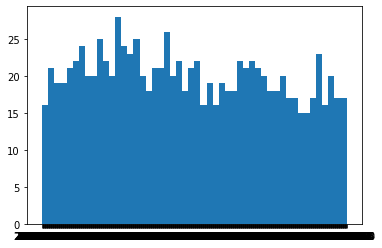

In [28]:
plt.hist(result, bins=50)
plt.show()